In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression

import random

%matplotlib inline

# Make results reproducible
random.seed(100)

In [29]:
import pandas as pd


class Dataloader():
    '''Bike Sharing Dataset dataloader.
    '''

    def __init__(self, csv_path):
        ''' Initialize Bike Sharing Dataset dataloader.

        Arguments:
            csv_path {str} -- Path to the Bike Sharing Dataset CSV file.
        '''

        self.csv_path = csv_path
        self.data = pd.read_csv(self.csv_path)

        # Shuffle
        self.data.sample(frac=1.0, replace=True, random_state=1)

    def getHeader(self):
        ''' Get the column names of the Bike Sharing CSV file.

        Returns:
            [list of str] -- the column names of the csv file
        '''

        return list(self.data.columns.values)

    def getData(self):
        ''' Get the pandas frames for the training, validation and test split

        Returns:
            [pandas frames] -- the pandas frames for the different splits
        '''

        # Split data into train, validation and test set with 60:20:20 ratio
        split_train = int(60 / 100 * len(self.data))
        split_val = int(80 / 100 * len(self.data))
        train = self.data[:split_train]
        val = self.data[split_train:split_val]
        test = self.data[split_val:]
        return train, val,  test

    def getFullData(self):
        ''' Get all the data in one single pandas frame.

        Returns:
            [pandas frame] -- the complete Bike Sharing Dataset data
        '''

        return self.data

In [30]:
dataloader = Dataloader('/content/hour.csv')
train, val, test = dataloader.getData()
fullData = dataloader.getFullData()

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

In [31]:
print(list(fullData.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [32]:
print(fullData.head(2))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  


In [33]:
print(fullData[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [34]:
for col in category_features:
    fullData[col] = fullData[col].astype('category')
print(fullData[category_features].describe())

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      5     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


In [35]:
print(fullData.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

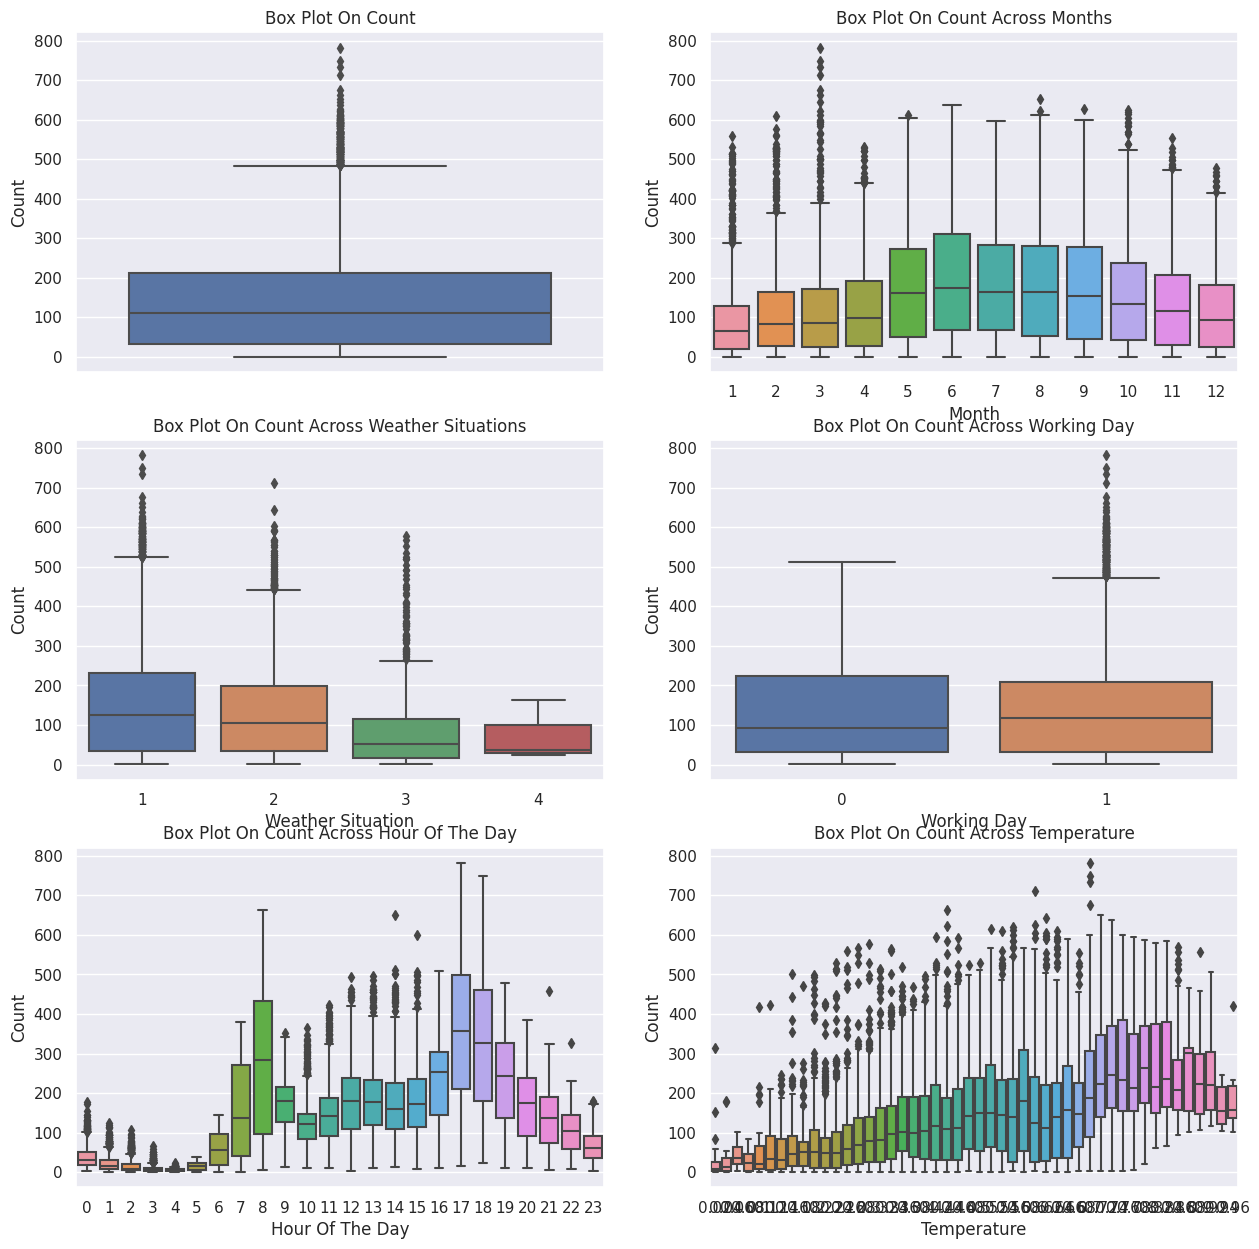

In [36]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")


<ipython-input-37-c8db1eddb835>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[target[-1]]);


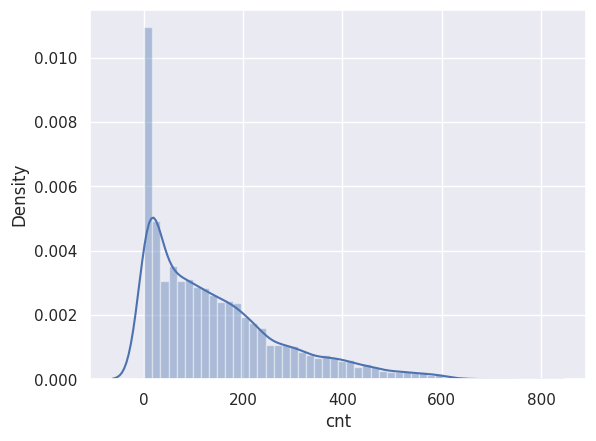

In [37]:
sns.distplot(train[target[-1]]);

Samples in train set with outliers: 10427
Samples in train set without outliers: 10151


<ipython-input-38-b267fe1112ef>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_preprocessed.cnt);


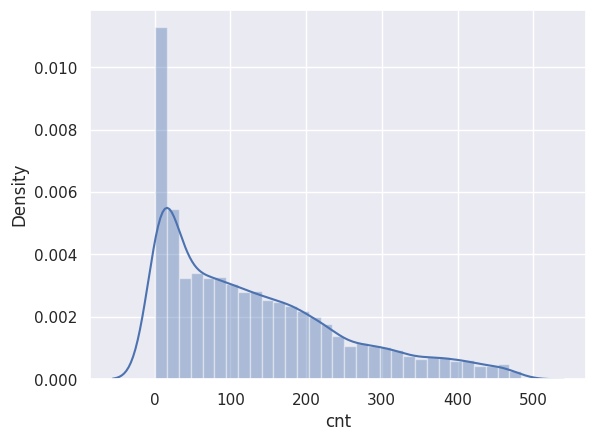

In [38]:
print("Samples in train set with outliers: {}".format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt);

<Axes: >

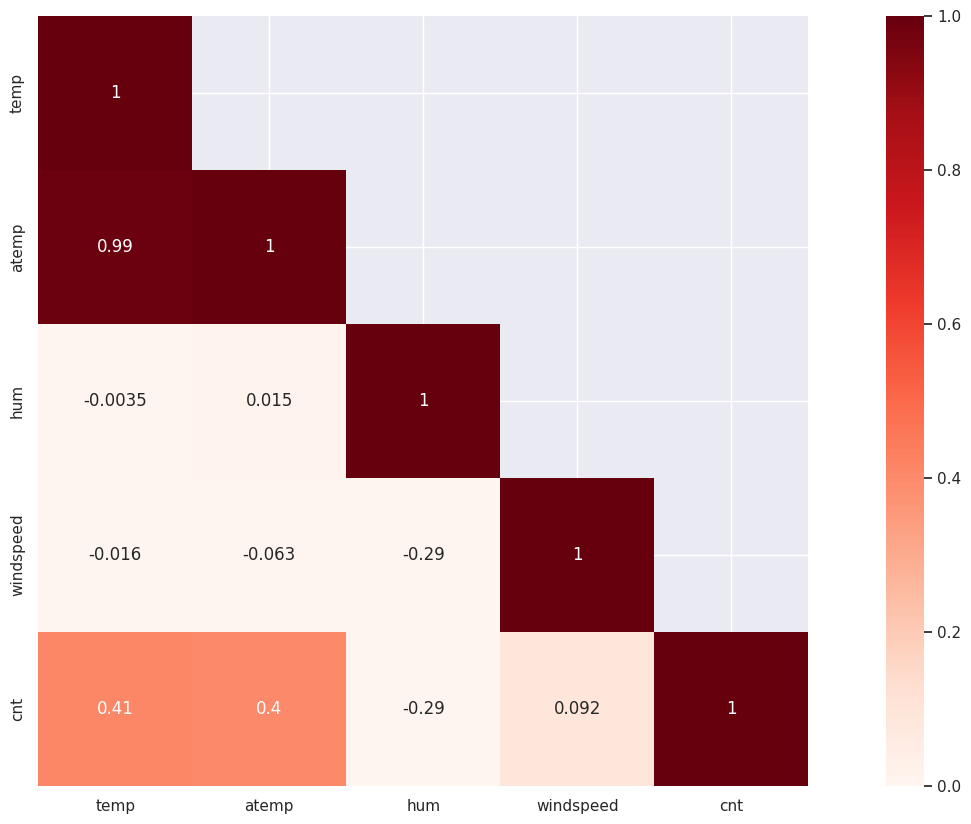

In [39]:
matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

In [40]:
features.remove('atemp')

In [41]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values

table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]

for model in models:
    model.fit(x_train, y_train)
    y_res = model.predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
|      SGDRegressor     |      41048.09      |   0.12   |
|         Lasso         |      43103.36      |   0.07   |
|       ElasticNet      |      54155.92      |  -0.17   |
|         Ridge         |      42963.88      |   0.07   |
|          SVR          |      50794.62      |  -0.09   |
|          SVR          |      41659.68      |   0.10   |
|    BaggingRegressor   |      19580.51      |   0.58   |
|    BaggingRegressor   |      53699.71      |  -0.16   |
|         NuSVR         |      41517.67      |   0.11   |
| RandomForestRegressor |      18949.93      |   0.59   |
+-----------------------+--------------------+----------+


In [42]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]

# Model training
model = RandomForestRegressor(n_estimators=200, criterion='friedman_mse', max_depth=None,
                               min_samples_split=4, min_samples_leaf=1,
                               max_features='auto', max_leaf_nodes=None,
                               min_weight_fraction_leaf=0.0, bootstrap=True,
                               oob_score=False, random_state=None, n_jobs=None,
                               verbose=0, warm_start=False)

model.fit(x_train, y_train)

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'),
                   format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


+-----------------------+------------+----------+-------+-------+----------+
|         Model         |  Dataset   |   MSE    |  MAE  | RMSLE | R² score |
+-----------------------+------------+----------+-------+-------+----------+
| RandomForestRegressor |  training  |  300.41  | 10.98 |  0.21 |   0.98   |
| RandomForestRegressor | validation | 18992.75 | 96.48 |  0.47 |   0.59   |
+-----------------------+------------+----------+-------+-------+----------+


In [43]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [44]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.634818)
2. feature temp (0.158878)
3. feature hum (0.050144)
4. feature workingday (0.046534)
5. feature weathersit (0.027276)
6. feature windspeed (0.026346)
7. feature mnth (0.020145)
8. feature weekday (0.019495)
9. feature season (0.013231)
10. feature holiday (0.003132)


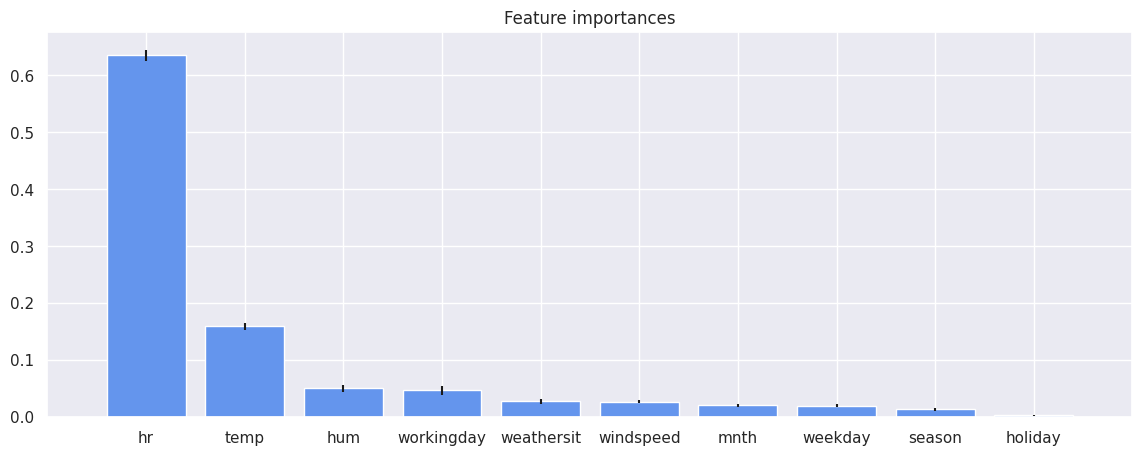

In [45]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()